In [ ]:
!pip install tweepy==4
!pip install textblob
!python -m textblob.download_corpora
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 KB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tweepy
    Found existing installation: tweepy 4.13.0
    Uninstalling tweepy-4.13.0:
      Successfully uninstalled tweepy-4.13.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading 

In [ ]:
import pandas as pd
import numpy as np
import tweepy
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/ML JComp/TweetDataset.csv",encoding="utf8")

In [ ]:
df

,Unnamed: 0,user_location,text,hashtags,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,Assam,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],0.800000,0.400000,Positive
1,4,"Adelaide, South Australia",@michellegrattan @ConversationEDU This is what...,NaN,0.000000,0.000000,Neutral
2,6,"Hyderabad, India",@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,0.000000,0.000000,Neutral
3,7,The Great Pacific Northwest,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],0.600000,-0.100000,Negative
4,8,"Washington, DC 20009","Most countries, without the ability to make #V...",['Vaccines'],0.233333,0.066667,Positive
...,...,...,...,...,...,...,...
314870,399633,Johannesburg,Whoopsies &lt;counts billions he made from gov...,"['covidvaccine', 'Pfizer']",0.000000,0.000000,Neutral
314871,399638,Nagpur,#GIS Representation of #Covid_19 scenario for ...,"['GIS', 'Covid_19', 'India', 'Vaccination', 'C...",0.472222,-0.044444,Negative
314872,399641,Lacombe,This is incredible. Pfizer boss backtracking o...,"['COVID19', 'CovidVaccine', 'cdnpoli', 'abpoli']",0.733333,0.400000,Positive
314873,399643,"Nashville, TN",The pharmaceutical industry would never lie to...,"['COVID', 'Vaccine', 'COVIDvaccine']",0.857143,-0.714286,Negative


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314875 entries, 0 to 314874
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             314875 non-null  int64  
 1   user_location          314875 non-null  object 
 2   text                   314874 non-null  object 
 3   hashtags               266922 non-null  object 
 4   TextBlob_Subjectivity  314875 non-null  float64
 5   TextBlob_Polarity      314875 non-null  float64
 6   Sentiment              314875 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 16.8+ MB


In [ ]:
#df.drop(['user_created','user_name','is_retweet','user_verified','user_followers','user_description','user_friends','user_favourites','date','source'],axis="columns",inplace=True)
df.isna().sum()

Unnamed: 0                   0
user_location                0
text                         1
hashtags                 47953
TextBlob_Subjectivity        0
TextBlob_Polarity            0
Sentiment                    0
dtype: int64

In [ ]:
df.shape

(314875, 7)

In [ ]:
df.dropna(subset=["user_location"],inplace=True)
df.drop_duplicates(subset="text",inplace=True)
df.shape

(314875, 7)

In [ ]:
df

,Unnamed: 0,user_location,text,hashtags,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,Assam,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],0.800000,0.400000,Positive
1,4,"Adelaide, South Australia",@michellegrattan @ConversationEDU This is what...,NaN,0.000000,0.000000,Neutral
2,6,"Hyderabad, India",@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,0.000000,0.000000,Neutral
3,7,The Great Pacific Northwest,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],0.600000,-0.100000,Negative
4,8,"Washington, DC 20009","Most countries, without the ability to make #V...",['Vaccines'],0.233333,0.066667,Positive
...,...,...,...,...,...,...,...
314870,399633,Johannesburg,Whoopsies &lt;counts billions he made from gov...,"['covidvaccine', 'Pfizer']",0.000000,0.000000,Neutral
314871,399638,Nagpur,#GIS Representation of #Covid_19 scenario for ...,"['GIS', 'Covid_19', 'India', 'Vaccination', 'C...",0.472222,-0.044444,Negative
314872,399641,Lacombe,This is incredible. Pfizer boss backtracking o...,"['COVID19', 'CovidVaccine', 'cdnpoli', 'abpoli']",0.733333,0.400000,Positive
314873,399643,"Nashville, TN",The pharmaceutical industry would never lie to...,"['COVID', 'Vaccine', 'COVIDvaccine']",0.857143,-0.714286,Negative


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df['sentiment']=le.fit_transform(df["sentiment"])
#df['user_verified']=le.fit_transform(df['user_verified'])
#y=df['sentiment']
#df.reset_index(inplace=True)
df.head()

,Unnamed: 0,user_location,text,hashtags,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,Assam,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],0.800000,0.400000,Positive
1,4,"Adelaide, South Australia",@michellegrattan @ConversationEDU This is what...,NaN,0.000000,0.000000,Neutral
2,6,"Hyderabad, India",@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,0.000000,0.000000,Neutral
3,7,The Great Pacific Northwest,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],0.600000,-0.100000,Negative
4,8,"Washington, DC 20009","Most countries, without the ability to make #V...",['Vaccines'],0.233333,0.066667,Positive


In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_analysis(tweet):
  def getSubjectivity(text):
    return TextBlob(str(text)).sentiment.subjectivity

  #Create a function to get the polarity
  def getPolarity(text):
    return TextBlob(str(text)).sentiment.polarity

  #Create two new columns ‘Subjectivity’ & ‘Polarity’
  df['TextBlob_Subjectivity'] =df['text'].apply(getSubjectivity)
  df['TextBlob_Polarity'] = df['text'].apply(getPolarity)
  def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
  df['Sentiment'] = df['TextBlob_Polarity'].apply(getAnalysis )
  return tweet

In [ ]:
#df['text'].apply(lambda x: sentiment_analysis(' '.join(x)))
#for tweet in df['text']:
#  sentiment_analysis(str(tweet))

In [ ]:
df.isnull().sum()

Unnamed: 0                   0
user_location                0
text                         1
hashtags                 47953
TextBlob_Subjectivity        0
TextBlob_Polarity            0
Sentiment                    0
dtype: int64

In [ ]:
#df.to_csv("Initial_Dataset.csv")

In [ ]:
df

,Unnamed: 0,user_location,text,hashtags,TextBlob_Subjectivity,TextBlob_Polarity,Sentiment
0,0,Assam,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],0.800000,0.400000,Positive
1,4,"Adelaide, South Australia",@michellegrattan @ConversationEDU This is what...,NaN,0.000000,0.000000,Neutral
2,6,"Hyderabad, India",@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,0.000000,0.000000,Neutral
3,7,The Great Pacific Northwest,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],0.600000,-0.100000,Negative
4,8,"Washington, DC 20009","Most countries, without the ability to make #V...",['Vaccines'],0.233333,0.066667,Positive
...,...,...,...,...,...,...,...
314870,399633,Johannesburg,Whoopsies &lt;counts billions he made from gov...,"['covidvaccine', 'Pfizer']",0.000000,0.000000,Neutral
314871,399638,Nagpur,#GIS Representation of #Covid_19 scenario for ...,"['GIS', 'Covid_19', 'India', 'Vaccination', 'C...",0.472222,-0.044444,Negative
314872,399641,Lacombe,This is incredible. Pfizer boss backtracking o...,"['COVID19', 'CovidVaccine', 'cdnpoli', 'abpoli']",0.733333,0.400000,Positive
314873,399643,"Nashville, TN",The pharmaceutical industry would never lie to...,"['COVID', 'Vaccine', 'COVIDvaccine']",0.857143,-0.714286,Negative


In [ ]:
df['Sentiment']=le.fit_transform(df["Sentiment"])

In [ ]:
df['Sentiment']

0         2
1         1
2         1
3         0
4         2
         ..
314870    1
314871    0
314872    2
314873    0
314874    1
Name: Sentiment, Length: 314875, dtype: int64

Output Sentiment is<br>
0 - Negative<br>
1 - Neutral<br>
2 - Positive<br>

<h1>Data Preprocessing (Tweet text Cleaning)

In [ ]:
import re
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/n

True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.util import *
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
wordnet = WordNetLemmatizer()

In [ ]:
corpus=[]
for tweet in df['text']:
    review = re.sub(r'http\S+',' ',str(tweet))#To remove any url
    review = re.sub(r'pic.twitter.com/[\w]*',' ',review)# To remove any pic from tweet
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split() # to make a list of words
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus[0]

In [ ]:
corpus

['australia manufacture covid vaccine give citizen free cost afp quote prime minister covidvaccine',
 'michellegrattan conversationedu pass leadership country voucher something w',
 'privilrodrigues yatish deepkaranahuja shristi amrita rashmisriniva akashrk sjanaqa',
 'msnbc well let qualify would anyone party get vaccine rushed minimally tested coming russia covidvaccine',
 'country without ability make vaccine locally forced rely others like u china',
 'dna zoom chart st week hear vaccine episode pandemic covid covidvaccine',
 'biocon executive chairperson kiran mazumdar shaw contract coronavirus informs twitter',
 'covid millionares covid corona covidvaccine',
 'great news pfizer vaccine entered phase trial read pharmaceutical',
 'dangerous yet come covidvaccine corona immunization coronaviruspandemic mutation gvirus',
 'seruminstindia looking raise billion around r crore covid vaccine development det',
 'global vaccine tracker vaccine covidvaccine',
 'coronavirus update american bu

In [ ]:
print("Original Tweet: ",df['text'][0])
print("Preprocessed tweet: ",corpus[0])
len(df)

Original Tweet:  Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister
#CovidVaccine
Preprocessed tweet:  australia manufacture covid vaccine give citizen free cost afp quote prime minister covidvaccine


314875

In [ ]:
#Visualize and view the most common words in tweets
word_list=[word for line in corpus for word in line.split()]
count_words=Counter(word_list).most_common(50)
words=pd.DataFrame(count_words)
words.columns=['word','freq']
px.bar(words, x='word', y='freq', title='Most Common Words')

In [ ]:
preprocessed=pd.DataFrame(corpus)
df=df.assign(Clean=corpus)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Embedding, SpatialDropout1D,Flatten, Dropout

In [ ]:
#Initialize the Tensorflow Tokenizer
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['Clean'].values)
df_train,df_val=df[df["Clean"].eq("train")],df[df["Sentiment"].eq("validation")]

In [ ]:
df['Clean']

0         australia manufacture covid vaccine give citiz...
1         michellegrattan conversationedu pass leadershi...
2         privilrodrigues yatish deepkaranahuja shristi ...
3         msnbc well let qualify would anyone party get ...
4         country without ability make vaccine locally f...
                                ...                        
314870    whoopsies lt count billion made goverments inj...
314871    gi representation covid scenario india th sept...
314872    incredible pfizer bos backtracking vaccine say...
314873    pharmaceutical industry would never lie u prod...
314874    running money covidvaccine covid covid covidis...
Name: Clean, Length: 314875, dtype: object

In [ ]:
voc_size = 3000# Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
epochs = 50  # Number of epochs to train the model for
batch = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 24  # Maximum number of words in a sequence


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Clean,df.Sentiment,test_size=0.1,random_state=42)
samplecheck=X_test.reset_index()

In [ ]:
samplecheck

,index,Clean
0,307,live today one two three vaccine covid current...
1,35195,covidvaccine let join hand successful covidvac...
2,107398,listen dr kevin brown consultant medical virol...
3,76390,pippacrerar absolute disgrace forever searchin...
4,124378,vaccination covidvaccine doyourpart
...,...,...
31483,90121,malwande tokwe tanzania government belief kill...
31484,22562,applies public transportation worker publictra...
31485,112587,need inhaled steroid well montelukast kinda br...
31486,244339,urban bengaluru covidvaccine availability free...


In [ ]:
#Tokenizing the preprocessed tweets, i.e. converting the text into vectors
tk = Tokenizer(num_words=voc_size,
filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n',lower=True, split=" ")
tk.fit_on_texts(X_train)
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [ ]:
X_train_seq

[[5, 9, 111, 253, 2, 2, 2, 26, 1],
 [1488, 123, 1755, 495, 1057, 1307, 2, 3],
 [661, 977, 1],
 [62,
  546,
  2916,
  1320,
  1913,
  177,
  287,
  279,
  269,
  1,
  1782,
  32,
  293,
  487,
  45,
  145,
  105,
  122,
  233],
 [169, 187, 113, 545, 980, 35, 50, 339, 1, 743],
 [33, 1],
 [1157, 227, 282, 620, 172, 957, 55, 49, 55, 2, 1414],
 [1563, 1722, 1],
 [41,
  153,
  786,
  38,
  2477,
  142,
  2663,
  112,
  1207,
  23,
  100,
  12,
  4,
  2,
  1,
  3,
  41,
  277,
  187,
  411],
 [19, 2079, 640, 1, 195, 1254, 98, 948],
 [529, 1, 2],
 [481, 5, 2, 3, 35, 27, 13, 3, 1, 47],
 [2789,
  94,
  362,
  1080,
  365,
  592,
  49,
  67,
  5,
  2709,
  266,
  605,
  281,
  40,
  592,
  211,
  451,
  131,
  1639,
  1021,
  91,
  72,
  122,
  566,
  2,
  51,
  1601,
  1],
 [484, 24, 1593, 11, 2, 7, 46, 1953, 399, 254, 23, 18, 18, 1],
 [22, 878, 684, 41, 91, 734, 388, 72, 1780, 551, 12],
 [1794, 72, 99, 421, 193, 921, 2071, 1],
 [35, 2, 7, 481, 423, 1012, 1013, 271, 1283, 1859, 35, 42, 101, 1],


In [ ]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [ ]:
X_train_seq_trunc[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   5,   9, 111, 253,   2,   2,   2,  26,   1], dtype=int32)

In [ ]:
len(X_train_seq_trunc)

283387

In [ ]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train, test_size=0.1, random_state=37)

In [ ]:
#Building the model with Embedding layer, LSTM(100 neurons) and a Dense Layer(3 neurons)
model = Sequential()
model.add(Embedding(voc_size, 8, input_length=MAX_LEN))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam'
                  , loss='sparse_categorical_crossentropy'
                  , metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 8)             24000     
                                                                 
 lstm (LSTM)                 (None, 100)               43600     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 flatten (Flatten)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3)                 303       
                                                                 
Total params: 67,903
Trainable params: 67,903
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history=model.fit(X_train_emb, y_train_emb,epochs=epochs,batch_size=batch,validation_data=(X_valid_emb, y_valid_emb))

Epoch 1/50
499/499 [==============================] - 4s 7ms/step - loss: 0.2784 - accuracy: 0.9094 - val_loss: 0.4237 - val_accuracy: 0.8772
Epoch 2/50
499/499 [==============================] - 4s 8ms/step - loss: 0.2761 - accuracy: 0.9102 - val_loss: 0.4256 - val_accuracy: 0.8770
Epoch 3/50
499/499 [==============================] - 4s 7ms/step - loss: 0.2758 - accuracy: 0.9105 - val_loss: 0.4259 - val_accuracy: 0.8781
Epoch 4/50
499/499 [==============================] - 3s 7ms/step - loss: 0.2734 - accuracy: 0.9110 - val_loss: 0.4190 - val_accuracy: 0.8786
Epoch 5/50
499/499 [==============================] - 3s 7ms/step - loss: 0.2725 - accuracy: 0.9113 - val_loss: 0.4233 - val_accuracy: 0.8771
Epoch 6/50
499/499 [==============================] - 3s 7ms/step - loss: 0.2715 - accuracy: 0.9119 - val_loss: 0.4333 - val_accuracy: 0.8766
Epoch 7/50
499/499 [==============================] - 4s 8ms/step - loss: 0.2699 - accuracy: 0.9121 - val_loss: 0.4315 - val_accuracy: 0.8771
Epoch 

In [ ]:
model.evaluate(X_test_seq_trunc,y_test)


984/984 [==============================] - 3s 3ms/step - loss: 0.5589 - accuracy: 0.8716


[0.5589272379875183, 0.8716336488723755]

In [ ]:
y_pred=model.predict(X_test_seq_trunc)

984/984 [==============================] - 3s 3ms/step


In [ ]:
y_pred

array([[9.8302078e-01, 8.5636368e-04, 1.6122822e-02],
       [1.5119113e-03, 2.9823828e-02, 9.6866423e-01],
       [3.2174219e-06, 9.9999678e-01, 1.2930209e-08],
       ...,
       [8.4668465e-02, 7.5522858e-01, 1.6010298e-01],
       [3.3268569e-07, 1.0926930e-06, 9.9999857e-01],
       [8.9903651e-03, 9.8071849e-01, 1.0291160e-02]], dtype=float32)

In [ ]:
print(y_pred[1])
print(samplecheck.loc[1]["Clean"])
print(np.argmax(y_pred[1]))

[0.00151191 0.02982383 0.9686642 ]
covidvaccine let join hand successful covidvaccination campaign unite fightcorona
2


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix

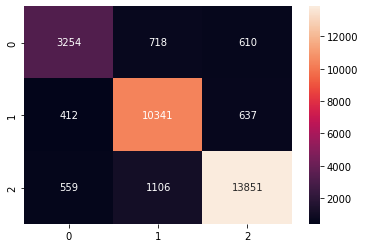

In [ ]:
import seaborn as sns
cm=confusion_matrix(y_test,y_pred.argmax(1))
f = sns.heatmap(cm, annot=True, fmt='d')

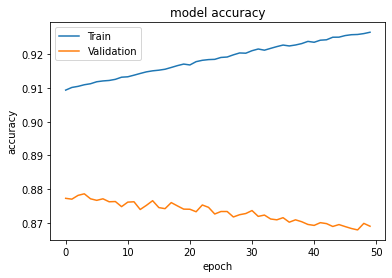

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

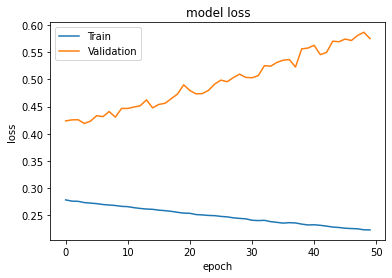

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy_score(y_test, y_pred.argmax(1))

0.8716336382113821

# Twitter

In [ ]:
#Twitter API Credentials
apikey="checkout tweepy (or whatever it's name is now) documentation "
apisecretkey="refer to the above variable"
bearertoken="bearertoken"
accesstoken="AcCeSs"
accesstokensecret="SeCrET"

In [ ]:
client=tweepy.Client(bearer_token=bearertoken)

In [ ]:
#Preprocessing and Tokenizing the tweets
def clean_tweet(tweet):
  review = re.sub(r'http\S+',' ', tweet)#To remove any url
  review = re.sub(r'pic.twitter.com/[\w]*',' ', review)# To remove any pic from tweet
  review = re.sub('[^a-zA-Z]', ' ', review)
  review = review.lower()
  #review = review.split() # to make a list of words
  #print(review)
  return review

def token_predict(tweet):
  tweet_token=tk.texts_to_sequences(tweet)
  #print(tweet_token)
  tk.fit_on_texts(tweet)
  #print(model.predict(tweet_token_pad))
  tweet_token_pad=pad_sequences(tweet_token, maxlen=MAX_LEN)
  return tweet_token_pad

In [ ]:
query="Covaxin -is:retweet"
#response=client.search_recent_tweets(query=query,max_results=100,tweet_fields=['lang'],sort_order="relevancy")
response=tweepy.Paginator(client.search_recent_tweets, query=query,tweet_fields=['lang'], max_results=100).flatten(limit=1000)
Covaxin_data=[]
print(response)
for tweet in response:
  if(tweet.lang=="en"):
    Covaxin_data.append(clean_tweet(tweet.text))
print(len(Covaxin_data))
arr=np.asarray(Covaxin_data)

<generator object Paginator.flatten at 0x7f2a5a0aa4a0>
715


In [ ]:
predict=token_predict(Covaxin_data)
arr=np.array(token_predict(Covaxin_data))
arr.shape
Covaxin=model.predict(arr)

23/23 [==============================] - 0s 3ms/step


In [ ]:
Covaxin_sentiment={}
cnt1=0
cnt0=0
cnt2=2
for i in range(0,len(Covaxin)):
  if np.argmax(Covaxin[i])==1:
    cnt1+=1
  elif np.argmax(Covaxin[i])==2:
    cnt2+=1
  else:
    cnt0+=1
Covaxin_sentiment['1-Neutral']=cnt1
Covaxin_sentiment['2-Positive']=cnt2
Covaxin_sentiment['0-Negative']=cnt0
Covaxin_sentiment
#Visualization
labels = list(Covaxin_sentiment.keys())
values = list(Covaxin_sentiment.values())

fig = px.pie(values=values, names=labels,title='Covaxin')
fig.update_layout(
    autosize=False,
    width=550,
    height=550)
fig.show()

In [ ]:
query="Bharat Biotech -is:retweet"
biotech=[]
for i in range(0,4):
  response=tweepy.Paginator(client.search_recent_tweets, query=query,tweet_fields=['lang'], max_results=100).flatten(limit=1000)
  for tweet in response:
    if(tweet.lang=="en"):
      biotech.append(clean_tweet(tweet.text))
  arr=np.asarray(biotech)
print(len(biotech))

2948


In [ ]:
predict=token_predict(biotech)
arr=np.array(token_predict(biotech))
#arr.shape
biotech=model.predict(arr)

93/93 [==============================] - 0s 2ms/step


In [ ]:
biotech_sentiment={}
cnt1=0
cnt0=0
cnt2=2
for i in range(0,len(biotech)):
  if np.argmax(biotech[i])==1:
    cnt1+=1
  elif np.argmax(biotech[i])==2:
    cnt2+=1
  else:
    cnt0+=1
biotech_sentiment['1-Neutral']=cnt1
biotech_sentiment['2-Positive']=cnt2
biotech_sentiment['0-Negative']=cnt0
biotech_sentiment
labels = list(biotech_sentiment.keys())
values = list(biotech_sentiment.values())

fig = px.pie(values=values, names=labels,title='Bharat Biotech')
fig.update_layout(
    autosize=False,
    width=550,
    height=550)
fig.show()

In [ ]:
query="Covishield -is:retweet"
covishield=[]
response=tweepy.Paginator(client.search_recent_tweets, query=query,tweet_fields=['lang'], max_results=100).flatten(limit=1000)
for tweet in response:
  if(tweet.lang=="en"):
    covishield.append(clean_tweet(tweet.text))
arr=np.asarray(covishield)
print(len(covishield))

predict=token_predict(covishield)
arr=np.array(token_predict(covishield))
#arr.shape
covishield=model.predict(arr)

701
22/22 [==============================] - 0s 3ms/step


In [ ]:
covishield_sentiment={}
cnt1=0
cnt0=0
cnt2=2
for i in range(0,len(covishield)):
  if np.argmax(covishield[i])==1:
    cnt1+=1
  elif np.argmax(covishield[i])==2:
    cnt2+=1
  else:
    cnt0+=1
covishield_sentiment['1-Neutral']=cnt1
covishield_sentiment['2-Positive']=cnt2
covishield_sentiment['0-Negative']=cnt0
covishield_sentiment
labels = list(covishield_sentiment.keys())
values = list(covishield_sentiment.values())

fig = px.pie(values=values, names=labels,title='Covishield')
fig.update_layout(
    autosize=False,
    width=550,
    height=550)
fig.show()

# BERT Trial

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
preprocess_url="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url="https://tfhub.dev/tensorflow/bert_en_uncased_L-24_H-1024_A-16/4"

In [ ]:
bert_preprocess_model=hub.KerasLayer(preprocess_url)
bert_encoder=hub.KerasLayer(encoder_url)

In [ ]:
bert_res=bert_preprocess_model(["Hi there","Hello"])
bert_result=bert_encoder(bert_res)
print(bert_result.keys())
print(bert_result['sequence_output'])

dict_keys(['sequence_output', 'pooled_output', 'default', 'encoder_outputs'])
tf.Tensor(
[[[ 0.00214348 -0.47899958 -0.13678975 ... -0.7053375   0.04698239
    0.22818163]
  [-0.33644494 -0.05577806 -0.33847487 ... -0.7168668   0.1783647
    0.04050206]
  [-0.15581776 -0.30226263 -0.52946264 ... -0.3826109  -0.36525393
    0.2887254 ]
  ...
  [ 0.2515253  -0.11037989 -0.26952595 ... -0.17288905 -0.44398353
    0.0687497 ]
  [ 0.13485895  0.17049862 -0.4523777  ...  0.16957252  0.20894752
   -0.02475517]
  [ 0.22470723 -0.09827045 -0.31194234 ... -0.3603237  -0.36807656
    0.04586561]]

 [[-0.79247236 -1.1698463   0.11539004 ... -0.71780574 -0.2753503
    0.6095289 ]
  [-0.51467294 -0.26878977 -0.40314966 ... -0.3947834  -0.19286844
    0.39664924]
  [-0.5741206   0.20573227 -0.44096756 ... -1.0535003  -0.37810928
   -0.13107903]
  ...
  [ 0.05025573 -0.5337118  -0.5184578  ... -0.23187834 -0.19607277
    0.27838188]
  [-0.08108903 -0.46305215 -0.6308408  ... -0.23799591 -0.25962842
  

In [ ]:
#text_preprocessed['input_mask']
#BERT uses Masked language modeling, i.e. it adds mask in the input text
# For eg, input = nice movie indeed -> CLS nice movie indeed SEP, that's why mask length is 5
#bert_model=hub.KerasLayer(encoder_url)
#bert_results=bert_model(text_preprocessed)
#bert_results.keys()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.Clean,df.Sentiment,test_size=0.1,random_state=42)

In [ ]:
#BERT
input_tweet=tf.keras.layers.Input(shape=(),dtype=tf.string,name="tweet")
preprocessed_tweet=bert_preprocess_model(input_tweet)
outputs=bert_encoder(preprocessed_tweet)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
#NN Layers
l=tf.keras.layers.Dropout(0.1,name="dropout")(outputs['pooled_output'])
l=tf.keras.layers.Dense(1,activation="sigmoid",name="output")(l)
l=tf.keras.layers.Flatten()(l)
l=tf.keras.layers.Dense(1,activation="sigmoid",name="final_output")(l)
model = tf.keras.Model(inputs=[input_tweet], outputs = [l])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 tweet (InputLayer)             [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['tweet[0][0]']                  
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [ ]:
y_train.shape
X_train.shape

(283387,)

In [ ]:
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
   6/8856 [..............................] - ETA: 2:39:52 - loss: -0.0856 - accuracy: 0.3385 - precision: 0.8594 - recall: 1.0000

KeyboardInterrupt: ignored

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 1.2 MB/s 
     |████████████████████████████████| 7.6 MB 505 kB/s 
     |████████████████████████████████| 182 kB 84.4 MB/s 


In [ ]:
from transformers import BertTokenizerFast
from transformers import TFBertModel

In [ ]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
tokenizer=BertTokenizerFast.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

train_input_ids=np.array([np.array(val) for val in train_input_ids])
train_attention_masks=np.array([np.array(val) for val in train_attention_masks])
val_input_ids=np.array([np.array(val) for val in val_input_ids])
val_attention_masks=np.array([np.array(val) for val in val_attention_masks])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.Clean.values,df.Sentiment.values,test_size=0.1,random_state=42)

In [ ]:
MAX_LEN=128

In [ ]:
def tokenize(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize(X_train, MAX_LEN)
#val_input_ids, val_attention_masks = tokenize(X_test.values, MAX_LEN)
test_input_ids, test_attention_masks = tokenize(X_test, MAX_LEN)

<ipython-input-99-c8d821f4870d>:14: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
def create_model(bert_model, max_len=MAX_LEN):

    ##params###
    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7)
    loss = tf.keras.losses.BinaryCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()
    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')
    embeddings = bert_model([input_ids,attention_masks])[1]
    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)
    return model

In [ ]:
model = create_model(bert_model, MAX_LEN)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_1[0][0]',                
                                thPoolingAndCrossAt               'input_2[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 128,                                         

In [ ]:
train_input_ids.shape

NameError: ignored

In [ ]:
history_bert = model.fit([train_input_ids,train_attention_masks], y_train, epochs=4, batch_size=32)

ValueError: ignored

In [ ]:
def convert_example_to_feature(tweet):
  return tokenizer.encode_plus(tweet,
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
# can be up to 512 for BERT
max_length = 512
batch_size = 6

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [ ]:
def encode_examples(ds, limit=-1):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  if (limit > 0):
      ds = ds.take(limit)
  for review, label in ds:
    bert_input = convert_example_to_feature(review.decode())
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df.Clean,df.Sentiment,test_size=0.1,random_state=42)

In [ ]:
# train dataset
X_train_encoded = encode_examples(X_train).shuffle(10000).batch(batch_size)
# test dataset
X_test_encoded = encode_examples(X_test).batch(batch_size)
